In [2]:
%matplotlib inline
# import some dependencies
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set()
except ImportError:
    pass

import torch
from torch.autograd import Variable

import pyro
import pyro.infer
import pyro.optim
import pyro.distributions as dist

torch.manual_seed(101)

In [17]:
def scale(guess):
    weight = pyro.sample("weight", dist.normal, guess, Variable(torch.ones(1)))
    return pyro.sample("measurement", dist.normal, weight, Variable(torch.Tensor([0.75])))

In [41]:
posterior = pyro.infer.Importance(scale, num_samples=100)

In [42]:
guess = Variable(torch.Tensor([8.5]))

In [43]:
guess

Variable containing:
 8.5000
[torch.FloatTensor of size 1]

In [44]:
marginal = pyro.infer.Marginal(posterior)

In [45]:
marginal(guess), marginal(guess), marginal(guess)

(Variable containing:
  8.8665
 [torch.FloatTensor of size 1], Variable containing:
  9.3954
 [torch.FloatTensor of size 1], Variable containing:
  8.1555
 [torch.FloatTensor of size 1])

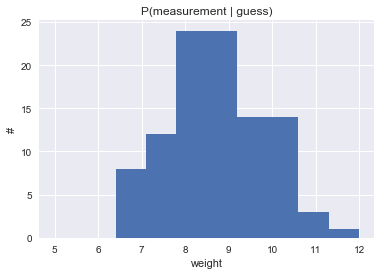

In [47]:
plt.hist([marginal(guess).data[0] for _ in range(100)], range=(5.0, 12.0))
plt.title("P(measurement | guess)")
plt.xlabel("weight")
plt.ylabel("#")

{'weight': Variable containing:
 7.9754
[torch.FloatTensor of size 1]
}


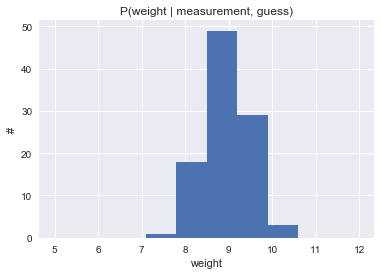

In [48]:
guess = Variable(torch.Tensor([8.5]))
measurement = Variable(torch.Tensor([9.5]))

conditioned_scale = pyro.condition(scale, data={"measurement": measurement})

marginal = pyro.infer.Marginal(
    pyro.infer.Importance(conditioned_scale, num_samples=100), sites=["weight"])

# The marginal distribution concentrates around the data
print(marginal(guess))
plt.hist([marginal(guess)["weight"].data[0] for _ in range(100)], range=(5.0, 12.0))
plt.title("P(weight | measurement, guess)")
plt.xlabel("weight")
plt.ylabel("#")